In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, MaxPool2D
#!pip install -U scikit-learn
#!pip install joblib
import joblib
#from sklearn.externals import joblib
import matplotlib.pyplot as plt


In [2]:
Y = joblib.load("Y_labels.sav")
X = joblib.load("X_images.sav")



In [3]:
print(Y[23])
print(type(X))

label_size = len(Y)
print(label_size)
X = np.array(X)
Y = np.array(Y)

print(type(X))
print(X.shape)

23
<class 'list'>
237200
<class 'numpy.ndarray'>
(237200, 64, 64, 1)


(64, 64)


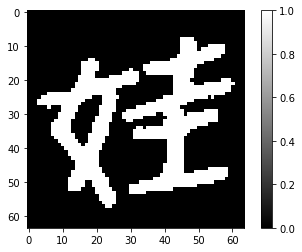

In [4]:

test_img = X[2]
test_img = np.reshape(test_img, (64,64))
size = np.reshape(test_img,(64,64,1))
print(test_img.shape)
plt.imshow(test_img, cmap ="gray")
plt.colorbar()
#print(len(X))

In [ ]:
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape =(64,64,1,) ))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

model.fit(X, Y, batch_size = 64, epochs = 10, validation_split = 0.1)

In [5]:
model = Sequential(layers=[
    Conv2D( name='conv2d_01',filters=32, kernel_size=5,activation='relu', input_shape=(64,64,1,),data_format='channels_last', ),
    MaxPool2D(name='maxpool2d_01',pool_size=2,),
    Conv2D(name='conv2d_02',filters=32,kernel_size=5,activation='relu',),
    MaxPool2D(name='maxpool2d_02',pool_size=2,),
    Conv2D(name='conv2d_03',filters=64,kernel_size=5,activation='relu',),
    MaxPool2D(name='maxpool2d_03',pool_size=2,),
    Flatten(name='flatten_01'),
    Dense(name='dense_01',units=256,activation='relu',),
    Dense( name='dense_output',units=y_labels.size(),activation='softmax',),
], name='Seq_01')

model.summary()

Model: "Seq_01"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_01 (Conv2D)           (None, 60, 60, 32)        832       
_________________________________________________________________
maxpool2d_01 (MaxPooling2D)  (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_02 (Conv2D)           (None, 26, 26, 32)        25632     
_________________________________________________________________
maxpool2d_02 (MaxPooling2D)  (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_03 (Conv2D)           (None, 9, 9, 64)          51264     
_________________________________________________________________
maxpool2d_03 (MaxPooling2D)  (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_01 (Flatten)         (None, 1024)              0    

In [6]:

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)
model.fit(X,Y, batch_size = 256, epochs = 16, validation_split = 0.1)


Train on 213480 samples, validate on 23720 samples
Epoch 1/16
213480/213480 [==============================] - 88s 413us/sample - loss: 3.1212 - accuracy: 0.4435 - val_loss: 0.8832 - val_accuracy: 0.7656
Epoch 2/16
213480/213480 [==============================] - 83s 387us/sample - loss: 0.5087 - accuracy: 0.8592 - val_loss: 0.5345 - val_accuracy: 0.8565
Epoch 3/16
213480/213480 [==============================] - 83s 387us/sample - loss: 0.2812 - accuracy: 0.9176 - val_loss: 0.4383 - val_accuracy: 0.8828
Epoch 4/16
213480/213480 [==============================] - 83s 388us/sample - loss: 0.1883 - accuracy: 0.9424 - val_loss: 0.4167 - val_accuracy: 0.8887
Epoch 5/16
213480/213480 [==============================] - 83s 388us/sample - loss: 0.1462 - accuracy: 0.9542 - val_loss: 0.3953 - val_accuracy: 0.8983
Epoch 6/16
213480/213480 [==============================] - 83s 388us/sample - loss: 0.1154 - accuracy: 0.9634 - val_loss: 0.3850 - val_accuracy: 0.9015
Epoch 7/16
213480/213480 [=====

In [7]:
model.save("Kanji2.model")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: Kanji2.model\assets
